ASSESSMENT OF THE EFFECTIVENESS OF SOCIAL MEDIA MARKETING IN ENHANCING CUSTOMER ENGAGEMENT IN SMALL AND MEDIUM ENTERPRISES (SMEs) IN NIGERIA


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

In [2]:
# Import the datset into python
df = pd.read_excel(r"C:\Users\ia\Desktop\Travail\Bello Shakiru\4\The effectiveness of social media marketing in enhancing customer engagement in Small and Medium Enterprises (SMEs) in Nigeria original.xlsx")


In [3]:
# View the first five variables
df.head()

,Duration,Research,Platforms,Advertise,Visibility,Research2,Referrals,Relationships,Communicate,Service,...,CostSavings,Interactions,PopUpAds,Reviews,Engagement,Inquiries,Ongoing,Loyalty,Growth,Growth2
0,1-5,1-2 years,Manufacturing,"Facebook, LinkedIn",Strongly Agree,Agree,Strongly Disagree,Neutral,Neutral,Strongly Disagree,...,Disagree,Disagree,Disagree,Neutral,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
1,11-20,3-4 years,Technology,"Facebook, Twitter, LinkedIn",Neutral,Neutral,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
2,51-100,3-4 years,Retail,Facebook,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,...,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,Neutral,Neutral,Neutral,Neutral
3,51-100,3-4 years,Manufacturing,Facebook,Agree,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Strongly Agree,Strongly Agree,Strongly Agree
4,6-10,3-4 years,Services,Facebook,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree


In [4]:
# To show the total number of rows and columns
df.shape

(100, 31)

In [5]:
# To show the number of each coloumn
df.columns

Index(['Duration', 'Research', 'Platforms', 'Advertise', 'Visibility',
       'Research2', 'Referrals', 'Relationships', 'Communicate', 'Service',
       'Feedback', 'Reach', 'Monitor', 'Recognition', 'Image', 'Purchases',
       'Distinctive', 'Understanding', 'CostReduction', 'CRM', 'Delivery',
       'CostSavings', 'Interactions', 'PopUpAds', 'Reviews', 'Engagement',
       'Inquiries', 'Ongoing', 'Loyalty', 'Growth', 'Growth2'],
      dtype='object')

In [6]:
# This attribute shows the data types of each column
df.dtypes

Duration         object
Research         object
Platforms        object
Advertise        object
Visibility       object
Research2        object
Referrals        object
Relationships    object
Communicate      object
Service          object
Feedback         object
Reach            object
Monitor          object
Recognition      object
Image            object
Purchases        object
Distinctive      object
Understanding    object
CostReduction    object
CRM              object
Delivery         object
CostSavings      object
Interactions     object
PopUpAds         object
Reviews          object
Engagement       object
Inquiries        object
Ongoing          object
Loyalty          object
Growth           object
Growth2          object
dtype: object

In [7]:
# This attribute shows the data types of each column
df.dtypes

Duration         object
Research         object
Platforms        object
Advertise        object
Visibility       object
Research2        object
Referrals        object
Relationships    object
Communicate      object
Service          object
Feedback         object
Reach            object
Monitor          object
Recognition      object
Image            object
Purchases        object
Distinctive      object
Understanding    object
CostReduction    object
CRM              object
Delivery         object
CostSavings      object
Interactions     object
PopUpAds         object
Reviews          object
Engagement       object
Inquiries        object
Ongoing          object
Loyalty          object
Growth           object
Growth2          object
dtype: object

In [8]:
# It will show the total no of unque value from whole data frame
df.nunique()

Duration          6
Research          6
Platforms         7
Advertise        26
Visibility        5
Research2         5
Referrals         5
Relationships     5
Communicate       5
Service           5
Feedback          5
Reach             5
Monitor           5
Recognition       5
Image             5
Purchases         5
Distinctive       5
Understanding     5
CostReduction     5
CRM               5
Delivery          5
CostSavings       5
Interactions      5
PopUpAds          5
Reviews           5
Engagement        5
Inquiries         5
Ongoing           5
Loyalty           5
Growth            5
Growth2           5
dtype: int64

In [9]:
# To Show Data type of each colum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Duration       100 non-null    object
 1   Research       100 non-null    object
 2   Platforms      100 non-null    object
 3   Advertise      100 non-null    object
 4   Visibility     100 non-null    object
 5   Research2      100 non-null    object
 6   Referrals      100 non-null    object
 7   Relationships  100 non-null    object
 8   Communicate    100 non-null    object
 9   Service        100 non-null    object
 10  Feedback       100 non-null    object
 11  Reach          100 non-null    object
 12  Monitor        100 non-null    object
 13  Recognition    100 non-null    object
 14  Image          100 non-null    object
 15  Purchases      100 non-null    object
 16  Distinctive    100 non-null    object
 17  Understanding  100 non-null    object
 18  CostReduction  100 non-null    

In [10]:
print(pd.concat([df["Duration"].value_counts(), df["Duration"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

# Convert Duration to numeric using mapping
Duration_map = {'1-5': 1, '6-10': 2, "11-20": 3, "21-50": 4, "51-100": 5, "Over 100": 6}
df['Duration'] = df['Duration'].map(Duration_map)

# Descriptive statistics
print(df['Duration'].describe())

          Count  Percentage
Duration                   
1-5          50        0.50
6-10         22        0.22
21-50        11        0.11
11-20        10        0.10
Over 100      4        0.04
51-100        3        0.03
count    100.000000
mean       2.070000
std        1.401695
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        6.000000
Name: Duration, dtype: float64


In [11]:
print(pd.concat([df["Research"].value_counts(), df["Research"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

# Convert Research to numeric using mapping
Research_map = {'1 year': 1, "1-2 years": 2, "3-4 years": 3, "5-6 years": 4, "7-10 years": 5, "Over 10 years": 6}
df['Research'] = df['Research'].map(Research_map)

# Descriptive statistics
print(df['Research'].describe())

               Count  Percentage
Research                        
3-4 years         38        0.38
1-2 years         23        0.23
5-6 years         21        0.21
1 year            10        0.10
Over 10 years      4        0.04
7-10 years         4        0.04
count    100.000000
mean       2.980000
std        1.171893
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: Research, dtype: float64


In [12]:
print(pd.concat([df["Platforms"].value_counts(), df["Platforms"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

# Convert Platforms to numeric using mapping
Platforms_map = {'Retail': 1, "Manufacturing": 2, "Services": 3, "Technology": 4, "Healthcare": 5, "Other": 6}
df['Platforms'] = df['Platforms'].map(Platforms_map)

# Descriptive statistics
print(df['Platforms'].describe())

                Count  Percentage
Platforms                        
Retail             33        0.33
Services           31        0.31
Technology         14        0.14
Manufacturing      13        0.13
Healthcare          7        0.07
Event planning      1        0.01
Fashion             1        0.01
count    98.000000
mean      2.479592
std       1.286164
min       1.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Platforms, dtype: float64


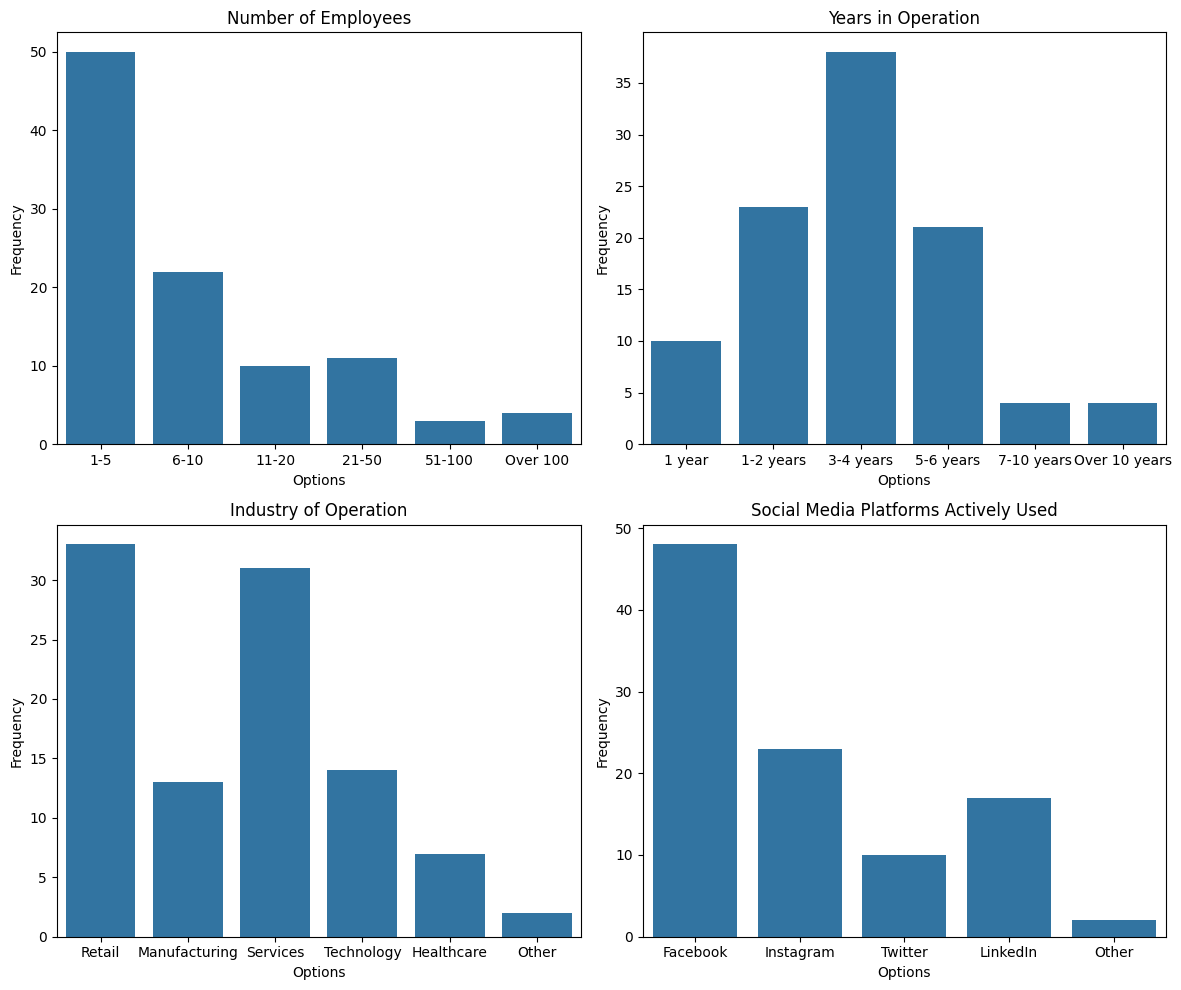

In [13]:

# Data for the graphs  
data = {  
    'Number of Employees': {  
        'Options': ['1-5', '6-10', '11-20', '21-50', '51-100', 'Over 100'],  
        'Frequency': [50, 22, 10, 11, 3, 4]  
    },  
    'Years in Operation': {  
        'Options': ['1 year', '1-2 years', '3-4 years', '5-6 years', '7-10 years', 'Over 10 years'],  
        'Frequency': [10, 23, 38, 21, 4, 4]  
    },  
    'Industry of Operation': {  
        'Options': ['Retail', 'Manufacturing', 'Services', 'Technology', 'Healthcare', 'Other'],  
        'Frequency': [33, 13, 31, 14, 7, 2]  
    },  
    'Social Media Platforms Actively Used': {  
        'Options': ['Facebook', 'Instagram', 'Twitter', 'LinkedIn', 'Other'],  
        'Frequency': [48, 23, 10, 17, 2]  
    }  
}  

# Create a figure for the plots  
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  

# Plotting Number of Employees  
sns.barplot(x='Options', y='Frequency', data=pd.DataFrame(data['Number of Employees']), ax=axes[0, 0])  
axes[0, 0].set_title('Number of Employees')  
axes[0, 0].set_ylabel('Frequency')  

# Plotting Years in Operation  
sns.barplot(x='Options', y='Frequency', data=pd.DataFrame(data['Years in Operation']), ax=axes[0, 1])  
axes[0, 1].set_title('Years in Operation')  
axes[0, 1].set_ylabel('Frequency')  

# Plotting Industry of Operation  
sns.barplot(x='Options', y='Frequency', data=pd.DataFrame(data['Industry of Operation']), ax=axes[1, 0])  
axes[1, 0].set_title('Industry of Operation')  
axes[1, 0].set_ylabel('Frequency')  

# Plotting Social Media Platforms Actively Used  
sns.barplot(x='Options', y='Frequency', data=pd.DataFrame(data['Social Media Platforms Actively Used']), ax=axes[1, 1])  
axes[1, 1].set_title('Social Media Platforms Actively Used')  
axes[1, 1].set_ylabel('Frequency')  

# Adjust layout  
plt.tight_layout()  
plt.show()  

In [14]:
print(pd.concat([df["Advertise"].value_counts(), df["Advertise"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

# Convert Advertise to numeric using mapping
Advertise_map = {'Facebook': 1, "Instagram": 2, "Twitter": 3, "LinkedIn": 4, "Others": 5}
df['Advertise'] = df['Advertise'].map(Advertise_map)

# Descriptive statistics
print(df['Advertise'].describe())

                                                    Count  Percentage
Advertise                                                            
Facebook                                               20        0.20
Facebook, Instagram, Twitter, LinkedIn                 18        0.18
Instagram                                              14        0.14
Facebook, Instagram, Twitter                            9        0.09
Twitter                                                 6        0.06
Facebook, Instagram                                     5        0.05
LinkedIn                                                5        0.05
Wassup                                                  2        0.02
Facebook, Instagram, WhatsApp                           2        0.02
Whatsapp                                                2        0.02
Whatsapp                                                2        0.02
WhatsApp, instagram and TikTok                          1        0.01
Instagram           

In [15]:
print(pd.concat([df["Visibility"].value_counts(), df["Visibility"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

# Convert Visibility to numeric using mapping
Visibility_map = {'Strongly Agree': 1, "Agree": 2, "Neutral": 3, "Disagree": 4, "Strongly Disagree": 5}
df['Visibility'] = df['Visibility'].map(Visibility_map)

# Descriptive statistics
print(df['Visibility'].describe())

                   Count  Percentage
Visibility                          
Strongly Agree        38        0.38
Agree                 33        0.33
Neutral               19        0.19
Strongly Disagree      8        0.08
Disagree               2        0.02
count    100.000000
mean       2.090000
std        1.172884
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Visibility, dtype: float64


In [ ]:
# For Research  
print(pd.concat([df["Research2"].value_counts(), df["Research2"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage'])) 

# Convert Research to numeric using mapping
Research2_map = {'Strongly Agree': 1, "Agree": 2, "Neutral": 3, "Disagree": 4, "Strongly Disagree": 5}  
df['Research2'] = df['Research2'].map(Research2_map)

# Descriptive statistics
print(df['Research2'].describe())  

                   Count  Percentage
Research2                           
Agree                 35        0.35
Strongly Agree        34        0.34
Neutral               21        0.21
Strongly Disagree      7        0.07
Disagree               3        0.03
count    100.000000
mean       2.140000
std        1.137248
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Research2, dtype: float64


In [ ]:
# For Referrals  
print(pd.concat([df["Referrals"].value_counts(), df["Referrals"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))  
Referrals_map = {'Strongly Agree': 1, "Agree": 2, "Neutral": 3, "Disagree": 4, "Strongly Disagree": 5}  
df['Referrals'] = df['Referrals'].map(Referrals_map)  
print(df['Referrals'].describe())  

# For Relationships  
print(pd.concat([df["Relationships"].value_counts(), df["Relationships"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))  
Relationships_map = {'Strongly Agree': 1, "Agree": 2, "Neutral": 3, "Disagree": 4, "Strongly Disagree": 5}  
df['Relationships'] = df['Relationships'].map(Relationships_map)  
print(df['Relationships'].describe())  

           Count  Percentage
Referrals                   
2             38        0.38
1             28        0.28
3             21        0.21
5             10        0.10
4              3        0.03
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Referrals, dtype: float64
               Count  Percentage
Relationships                   
2                 36        0.36
1                 35        0.35
3                 18        0.18
5                  7        0.07
4                  4        0.04
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Relationships, dtype: float64


In [ ]:
# For Communicate  
print(pd.concat([df["Communicate"].value_counts(), df["Communicate"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))  
Communicate_map = {'Strongly Agree': 1, "Agree": 2, "Neutral": 3, "Disagree": 4, "Strongly Disagree": 5}  
df['Communicate'] = df['Communicate'].map(Communicate_map)  
print(df['Communicate'].describe()) 

                   Count  Percentage
Communicate                         
Agree                 35        0.35
Strongly Agree        34        0.34
Neutral               21        0.21
Strongly Disagree      7        0.07
Disagree               3        0.03
count    100.000000
mean       2.140000
std        1.137248
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Communicate, dtype: float64


In [ ]:
# Assuming df is your DataFrame  
columns_to_process = [  
    "Visibility", "Research", "Referrals", "Relationships", "Communicate",  
    "Service", "Feedback", "Reach", "Monitor", "Recognition", "Image",  
    "Purchases", "Distinctive", "Understanding", "CostReduction", "CRM",  
    "Delivery", "CostSavings", "Interactions", "PopUpAds", "Reviews",  
    "Engagement", "Inquiries", "Ongoing", "Loyalty", "Growth", "Growth2"  
]  

# Mapping for responses  
response_map = {  
    'Strongly Agree': 1,  
    'Agree': 2,  
    'Neutral': 3,  
    'Disagree': 4,  
    'Strongly Disagree': 5  
}  

for column in columns_to_process:  
    # Count and percentage  
    print(pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))  
    
    # Convert to numeric using mapping  
    df[column] = df[column].map(response_map)  
    
    # Descriptive statistics  
    print(df[column].describe())  

            Count  Percentage
Visibility                   
1.0            38    0.387755
2.0            33    0.336735
3.0            19    0.193878
5.0             8    0.081633
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Visibility, dtype: float64
Empty DataFrame
Columns: [Count, Percentage]
Index: []
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Research, dtype: float64
Empty DataFrame
Columns: [Count, Percentage]
Index: []
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Referrals, dtype: float64
Empty DataFrame
Columns: [Count, Percentage]
Index: []
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Relationships, dtype: float64
             Count  Percentage
Communicate                   
2               35        0.35
1             

C:\Users\ia\AppData\Local\Temp\ipykernel_4024\3921971750.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric = df.replace(response_mapping)


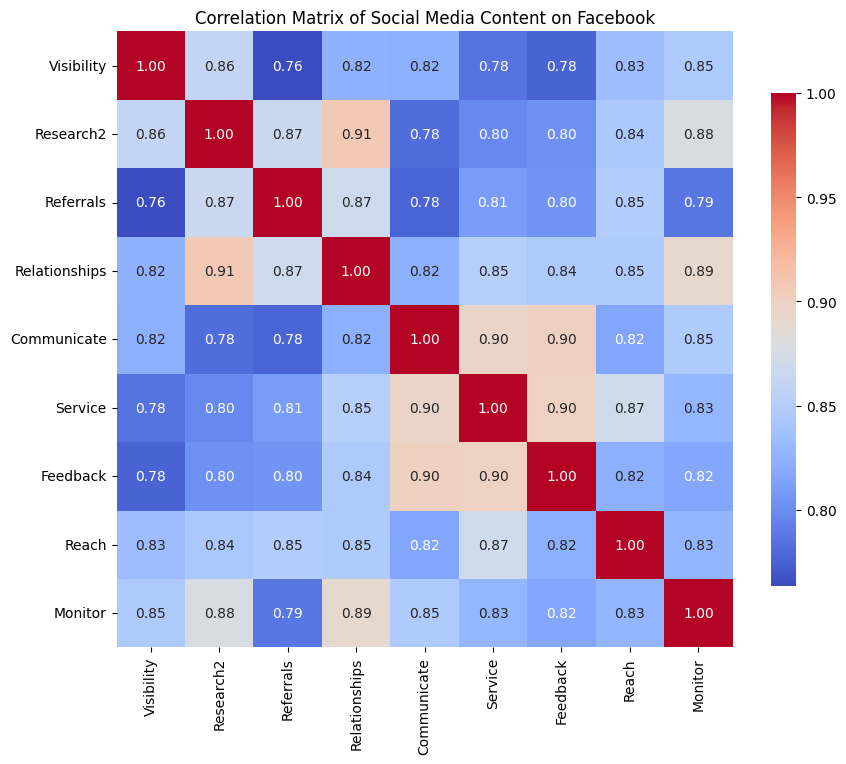

In [ ]:
# Assuming df is your DataFrame containing the imported data  
# Replace the categorical responses with numeric values  
response_mapping = {  
    'Strongly Agree': 1,  
    'Agree': 2,  
    'Neutral': 3,  
    'Disagree': 4,  
    'Strongly Disagree': 5  
}  

# Convert the DataFrame to numeric  
df_numeric = df.replace(response_mapping)  

# Select the relevant columns for correlation  
columns_of_interest = ['Visibility', 'Research2', 'Referrals', 'Relationships',   
                       'Communicate', 'Service', 'Feedback', 'Reach', 'Monitor']  
df_selected = df_numeric[columns_of_interest]  

# Calculate the correlation matrix  
correlation_matrix = df_selected.corr()  

# Set up the matplotlib figure  
plt.figure(figsize=(10, 8))  

# Create a heatmap  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})  

# Set the title  
plt.title('Correlation Matrix of Social Media Content on Facebook')  

# Show the plot  
plt.show()  

In [ ]:
# Calculate the correlation matrix  
correlation_matrix = df_selected.corr()  

# View the correlation matrix
print(correlation_matrix)

               Visibility  Research2  Referrals  Relationships  Communicate  \
Visibility       1.000000   0.861326   0.763455       0.824326     0.823463   
Research2        0.861326   1.000000   0.865457       0.907390     0.781318   
Referrals        0.763455   0.865457   1.000000       0.868644     0.776647   
Relationships    0.824326   0.907390   0.868644       1.000000     0.822313   
Communicate      0.823463   0.781318   0.776647       0.822313     1.000000   
Service          0.784073   0.797317   0.809204       0.850897     0.895471   
Feedback         0.775725   0.802060   0.804226       0.844878     0.899377   
Reach            0.833283   0.843512   0.847812       0.845817     0.815277   
Monitor          0.845256   0.876202   0.786625       0.890965     0.846470   

                Service  Feedback     Reach   Monitor  
Visibility     0.784073  0.775725  0.833283  0.845256  
Research2      0.797317  0.802060  0.843512  0.876202  
Referrals      0.809204  0.804226  0.8478